In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.linalg as sla
    
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

### Linear Regression
If there's a linear correlation between features and targert 
$$
y = w_1x_1 + w_2x_2 + ... + w_kx_k + b
$$
where  y - target, x - feature , w - weight of i feature, b - bias 

##### Loss 
$$
L(y_{pred}, Y) = \frac{1}{n}||y_{pred}-Y||^2_{2} = \frac{1}{n}||Xw - Y||^2_2 = \frac{1}{n}\sum_{i=1}^{n}\left(\sum_{j=1}^{m} x_{ij}w_j - y_i\right)^2 =: L(w)
$$

##### Method of the minimum loss gives such solution:
$$
    w = (X^TX)^{-1}X^TY
$$

In [8]:
class LinearRegression__:
    def __init__ (self, fit_intercept = True):
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y):
        n, k = X.shape

        X_train = X

        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y
        
        return self
    
    def predict(self, X):
        n, K = X.shape

        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = X_train @ self.w

        return y_pred

    def get_weights(self):
        return self.w

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
def linear_expression(x):
    return 5 * x + 6

In [11]:
objects_num = 50
X = np.linspace(-5, 5, objects_num)
y = linear_expression(X) + np.random.randn(objects_num) * 5
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5)

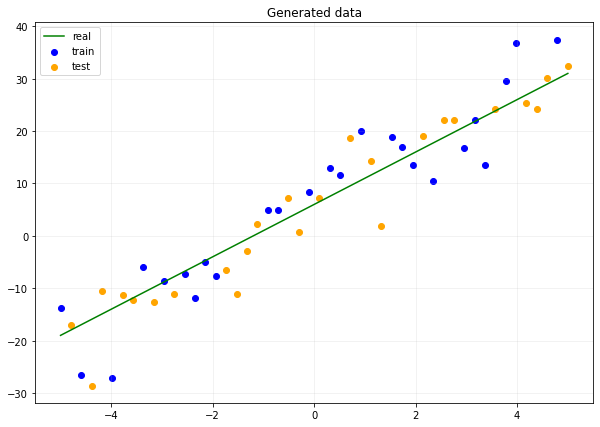

In [12]:
plt.figure(figsize = (10, 7))
plt.plot(X, linear_expression(X), label = 'real', c ='g')
plt.scatter(X_train, y_train, label = 'train', c = 'b')
plt.scatter(X_test, y_test, label = 'test', c = 'orange')

plt.title("Generated data")
plt.grid(alpha = 0.2)
plt.legend()

In [13]:
#teaching the model 
regressor = LinearRegression__()
regressor.fit(X_train[:, np.newaxis], y_train)
prediction = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()
w

array([5.63709651, 6.4425734 ])

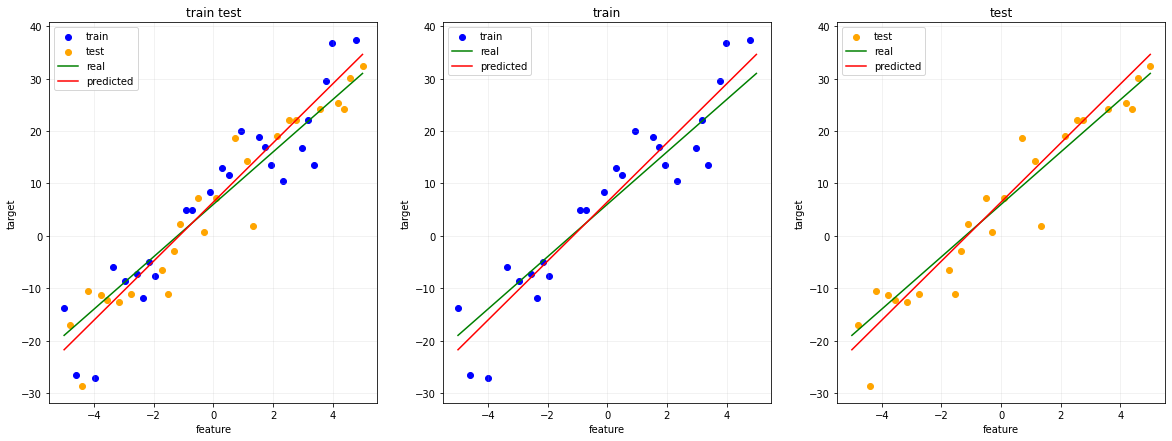

In [14]:
plt.figure(figsize = (20, 7))

ax = None
for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(1, 3, i + 1, sharey = ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label = 'train', c = 'b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label = 'test', c = 'orange')
    
    plt.plot(X, linear_expression(X), label = 'real', c = 'g')
    plt.plot(X, regressor.predict(X[:, np.newaxis]), label = 'predicted', c = 'r')

    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(" ".join(types))
    plt.grid(alpha = 0.2)
    plt.legend()
plt.show()

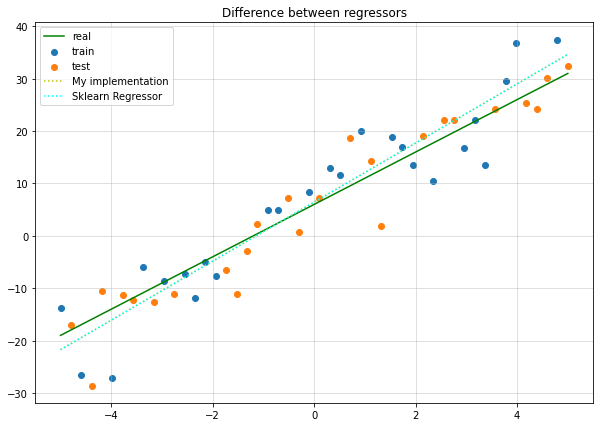

In [15]:
sk_reg = LinearRegression().fit(X_train[:, np.newaxis], y_train)

plt.figure(figsize = (10, 7))
plt.plot(X, linear_expression(X), label = 'real', c = 'g')

plt.scatter(X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, label = 'test')

plt.plot(X, regressor.predict(X[:, np.newaxis]), label = 'My implementation', c = 'y', linestyle = ':')
plt.plot(X, sk_reg.predict(X[:, np.newaxis]), label = 'Sklearn Regressor', c = 'cyan', linestyle = ':')
plt.grid(alpha = 0.5)
plt.title('Difference between regressors')
plt.legend()

plt.show()


### Results


In [16]:
from sklearn.metrics import mean_squared_error

train_prediction = regressor.predict(X_train[:, np.newaxis])
test_prediction = regressor.predict(X_test[:, np.newaxis])

print('Train MSE: ', mean_squared_error(y_train, train_prediction))
print('Test MSE: ', mean_squared_error(y_test, test_prediction))

Train MSE:  33.11949881795609
Test MSE:  24.334965406643704


### Stochastic Gradient Descent: 
1. Compitation of  $\displaystyle\frac{\partial{L}}{\partial{w}}$ -- gradient of loss  $L(y_{pred}, y_{true})$) in dependence of $w$ (weights)
2. Changing the $w$ with learning rate:
$$w = w - h\frac{\partial{L}}{\partial{w}}$$
3. Repeat 1 & 2 till loss wont be changing 

##### Math implementation 
$$
L(y_{pred}, Y) = \frac{1}{n}||y_{pred} - Y||^2 = \frac{1}{n}||Xw - Y||^2 = \frac{1}{n}(Xw - Y)^T(Xw-Y) = \frac{1}{n}(w^TX^TXw - X^Tw^TY - Y^TXw + Y^TY)
$$
$$
\frac{\partial L}{\partial w} = \frac {2}{n}(X^TXw - Y^TX) = \frac {2}{n}(X^TXw - X^TY) = \frac {2}{n}X^T(Xw - Y)
$$

In [17]:
def mean_squared_error__(prediction, observation):
    result = prediction - observation
    result = result ** 2
    res = result.sum()/prediction.size
    return res

In [54]:
class LinearRegressionGSD(LinearRegression__):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = None
    
    def fit(self, X, y, lr=0.01, max_iter=100):
        n, k = X.shape

        if (self.w == None):
            if self.fit_intercept:
                self.w = np.random.randn(k + 1)
            else: 
                self.w = np.random.randn(k)

        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))
        else:
            X_train = X
        
        self.losses = []
        
        for iter_num in range(max_iter):
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y_pred, y))

            grad = self.calculate_gradient(X_train, y, y_pred)

            assert grad.shape == self.w.shape, f"gradient shape {grad.shape} is not equal weight shape {self.w.shape}"
            self.w -= lr * grad

        return self

    def calculate_gradient(self, X, y, y_pred):
        grad = 2 * (y_pred - y)[:, np.newaxis] * X
        grad = grad.mean(axis=0)
        return grad

    def get_losses(self):
        return self.losses

In [55]:
regressor = LinearRegressionGSD(fit_intercept=True)

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses()

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

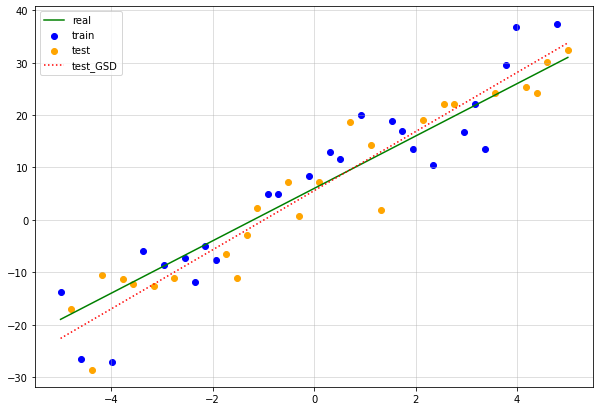

In [60]:
plt.figure(figsize = (10, 7))
plt.plot(X, linear_expression(X), label = 'real', c = 'g')
plt.scatter(X_train, y_train, label = "train", c = 'b')
plt.scatter(X_test, y_test, label = 'test', c = 'orange')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label = 'test_GSD', c = 'red', linestyle = ':')
plt.legend()
plt.grid(alpha = 0.5)
plt.show()

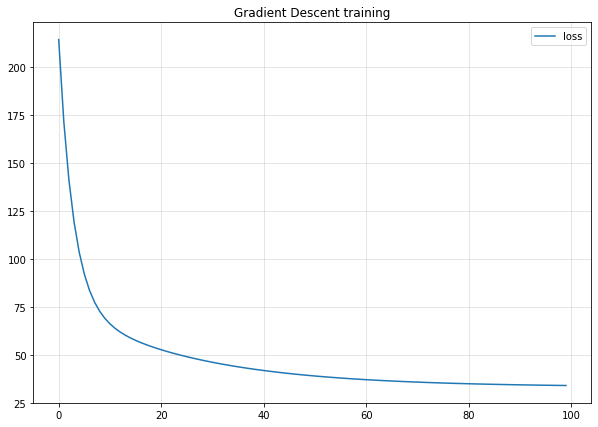

In [66]:
plt.figure(figsize = (10, 7))
plt.plot(regressor.get_losses(), label = 'loss')
plt.title('Gradient Descent training')
plt.grid(alpha = 0.4)
plt.legend()
plt.show()


### Adding Batch 

In [78]:
class LinearRegressionGSDwithBatch(LinearRegressionGSD):
    def __init__ (self, n_samples = 10, **kwargs):
        super().__init__(**kwargs)
        self.w = None
        self.n_samples = n_samples
        
    def calculate_gradient(self, X, y, y_pred): 
        inds = np.random.choice(np.arange((X.shape[0])), size = self.n_samples, replace = False)
        
        grad = 2 * (y_pred[inds] - y[inds])[:, np.newaxis] * X[inds]
        grad = grad.mean(axis = 0)
        return grad 

In [80]:
regressor = LinearRegressionGSDwithBatch(fit_intercept = True)

l = regressor.fit(X_train[:, np.newaxis], y_train)

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

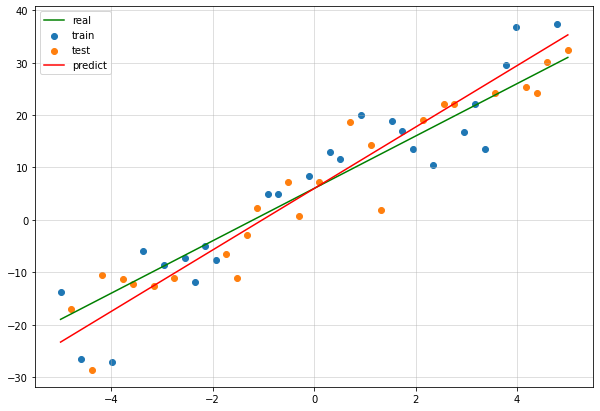

In [84]:
plt.figure(figsize = (10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, label = 'test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label = 'predict', c = 'red')

plt.grid(alpha = 0.5)
plt.legend()
plt.show()

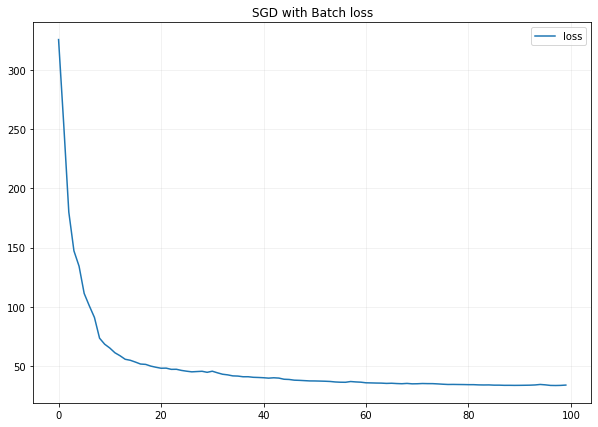

In [93]:
plt.figure(figsize = (10, 7))
plt.plot(regressor.get_losses(), label = 'loss')
plt.title('SGD with Batch loss')
plt.legend()
plt.grid(alpha = 0.2)
plt.show()

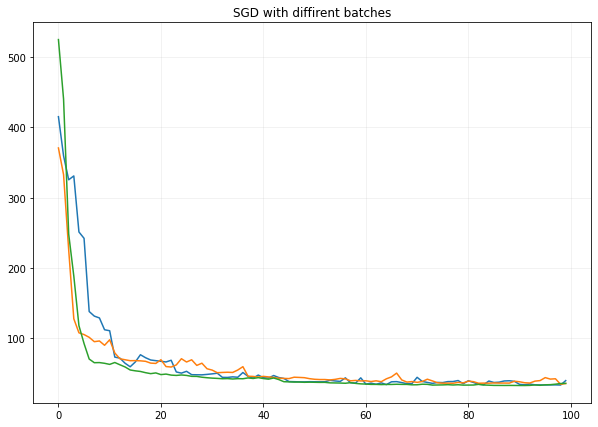

In [92]:
batch_lens = [1, 2, 4]
plt.figure(figsize = (10, 7))
plt.title("SGD with diffirent batch sizes")

for i in batch_lens:
    r = LinearRegressionGSDwithBatch(n_samples = i)
    r.fit(X_train[:, np.newaxis], y_train)
    plt.plot(r.get_losses())

plt.grid(alpha = 0.2)
plt.show()